# [NIPA 활용과정] 센서 데이터를 활용한 공정 이상 예측 실습

UCI에서 제공하는 SECOM 공정에서 측정된 센서 데이터를 기반으로 한 데이터를 바탕으로 공정 이상을 예측해보는 머신러닝 실습을 수행해 보겠습니다.

데이터 출처: https://archive.ics.uci.edu/ml/datasets/SECOM

이번 실습은 다음과 같은 과정으로 진행합니다.

1. **데이터 읽기:** SECOM 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악

4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

5. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행

6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행

7. **불균형 class 데이터 처리:** 예측의 정확도를 높이기 위하여 불균형 class 데이터를 처리

In [1]:
!pip install --upgrade pip
!pip install -U pandas
!pip install -U numpy
!pip install -U scipy
!pip install -U scikit-learn
!pip install xgboost

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (20.2.4)
     |████████████████████████████████| 9.5 MB 1.7 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

dopamine-rl 3.1.8 requires tensorflow>=2.2.0, but you'll have tensorflow 2.0.0 which is incompatible.
     |████████████████████████████████| 14.5 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
ERROR: After October 2020 you may experience errors when installing or up

## 1. 데이터 읽기

pandas를 사용하여 `uci-secom.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

seaborn은 matplotlib을 기반으로 하는 파이썬 데이터 시각화 라이브러리입니다.매력적이고 유익한 통계 그래픽을 그리기 위해서 고급 인터페이스를 제공합니다. 

%matplotlib inline를 사용할 수 있습니다. 이것은 matplotlib의 결과인 그래프를 출력영역에 표시하라는 명령입니다. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# german_credit_data.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
data = pd.read_csv('uci-secom.csv')

In [4]:
# 5개의 행을 확인합니다. head()를 사용합니다. head() 안에 숫자를 넣을 수 있습니다. 
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [5]:
# dataframe의 정보를 요약해서 출력합니다.
# info()로 정보를 알 수 있습니다.
# shape로 몇 행과 몇 열로 되어있는지 알 수 있습니다. 처음이 행이고 두번째 열입니다.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(1567, 592)

In [6]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


## 2. 데이터 정제

일반적으로 데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

**결측값**은 값이 없는 것을 말합니다. NaN, Null이 결측값입니다. 

**이상치**는 일반적인 범주에서 벗어난 값을 말합니다. 평균 연령을 구할 때 200살과 같이 일반적인 범주에 있지 않는 값을 이상치라고 합니다. 

머신러닝 모델을 만들 때는 데이터가 중요합니다. 결측값과 이상치는 모델의 성능에 안 좋은 영향을 줄 수 있으므로 처리해서 사용합니다.

이번 데이터에서는 수많은 변수(feature)가 존재하기에 각 데이터를 보며 이상치를 처리하기엔 한계가 있습니다.

따라서 본 과정에서는 간단하게 결측값에 대해서만 처리를 수행하겠습니다.

### 2.1. 결측값 확인

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [7]:
# 결측값 정보를 출력합니다.
# isnull()은 결측값이 있는지 True, False로 반환합니다. 
# data.isnull().sum()로 각 컬럼에서 결측값의 수를 구합니다.
# data.isnull().sum().sum()로 전체 결측값의 수를 구할 수 있습니다.
data.isnull().sum()

Time           0
0              6
1              7
2             14
3             14
4             14
5             14
6             14
7              9
8              2
9              2
10             2
11             2
12             2
13             3
14             3
15             3
16             3
17             3
18             3
19            10
20             0
21             2
22             2
23             2
24             2
25             2
26             2
27             2
28             2
            ... 
561            1
562          273
563          273
564          273
565          273
566          273
567          273
568          273
569          273
570            0
571            0
572            0
573            0
574            0
575            0
576            0
577            0
578          949
579          949
580          949
581          949
582            1
583            1
584            1
585            1
586            1
587            1
588           

### 2.2. 결측값 처리

In [8]:
# 결측값을 0으로 대체합니다.
# np.NaN이 결측값입니다. 이것을 replace을 사용해서 0으로 바꿉니다.
data = data.replace(np.NaN, 0)

# 결측값 정보를 출력합니다.
data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
            ..
561          0
562          0
563          0
564          0
565          0
566          0
567          0
568          0
569          0
570          0
571          0
572          0
573          0
574          0
575          0
576          0
577          0
578          0
579          0
580          0
581          0
582          0
583          0
584          0
585          0
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [9]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 큰 영향이 없다 생각하여 삭제합니다.
# axis=0은 행방향으로 동작합니다. 
# axis=1은 열 방향으로 동작합니다. 
# drop() 안에 삭제할 컬럼 이름을 적고 axis =1 로 정합니다.
data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [10]:
# data에서 잘 삭제되었는지 확인합니다.
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.0000,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


## 3. 데이터 시각화

머신러닝을 할 때 숫자만으로는 데이터가 어떤 의미를 갖는지 이해하기 어렵습니다. 

그래서 데이터를 시각화해서 파악하는 것이 중요합니다. 

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

센서에 관련된 590개의 변수들은 시각화하기에 너무 양이 많기에 영향력이 크다고 판단되는 `103` 센서에 대해서만 시각화를 진행해 보겠습니다. 103번 데이터는 트리 모델을 사용했을 때, 높은 중요도로 뽑힌 변수이기에 대표로 출력하였습니다. 

### 3.1. 다양한 방법으로 시각화 하기

다양한 방법으로 시각화를 할 수 있습니다. 데이터의 특징에 맞게 시각화를 하는 것이 중요합니다. 

In [20]:
#3,4,5,Pass/Fail 컬럼으로 새로운 DataFrame을 만듭니다. 리스트 안에 컬럼 이름을 적습니다. 
data_test= data[['100','101','102','103','104','105','106','107','108','109','Pass/Fail']]
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.0000,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


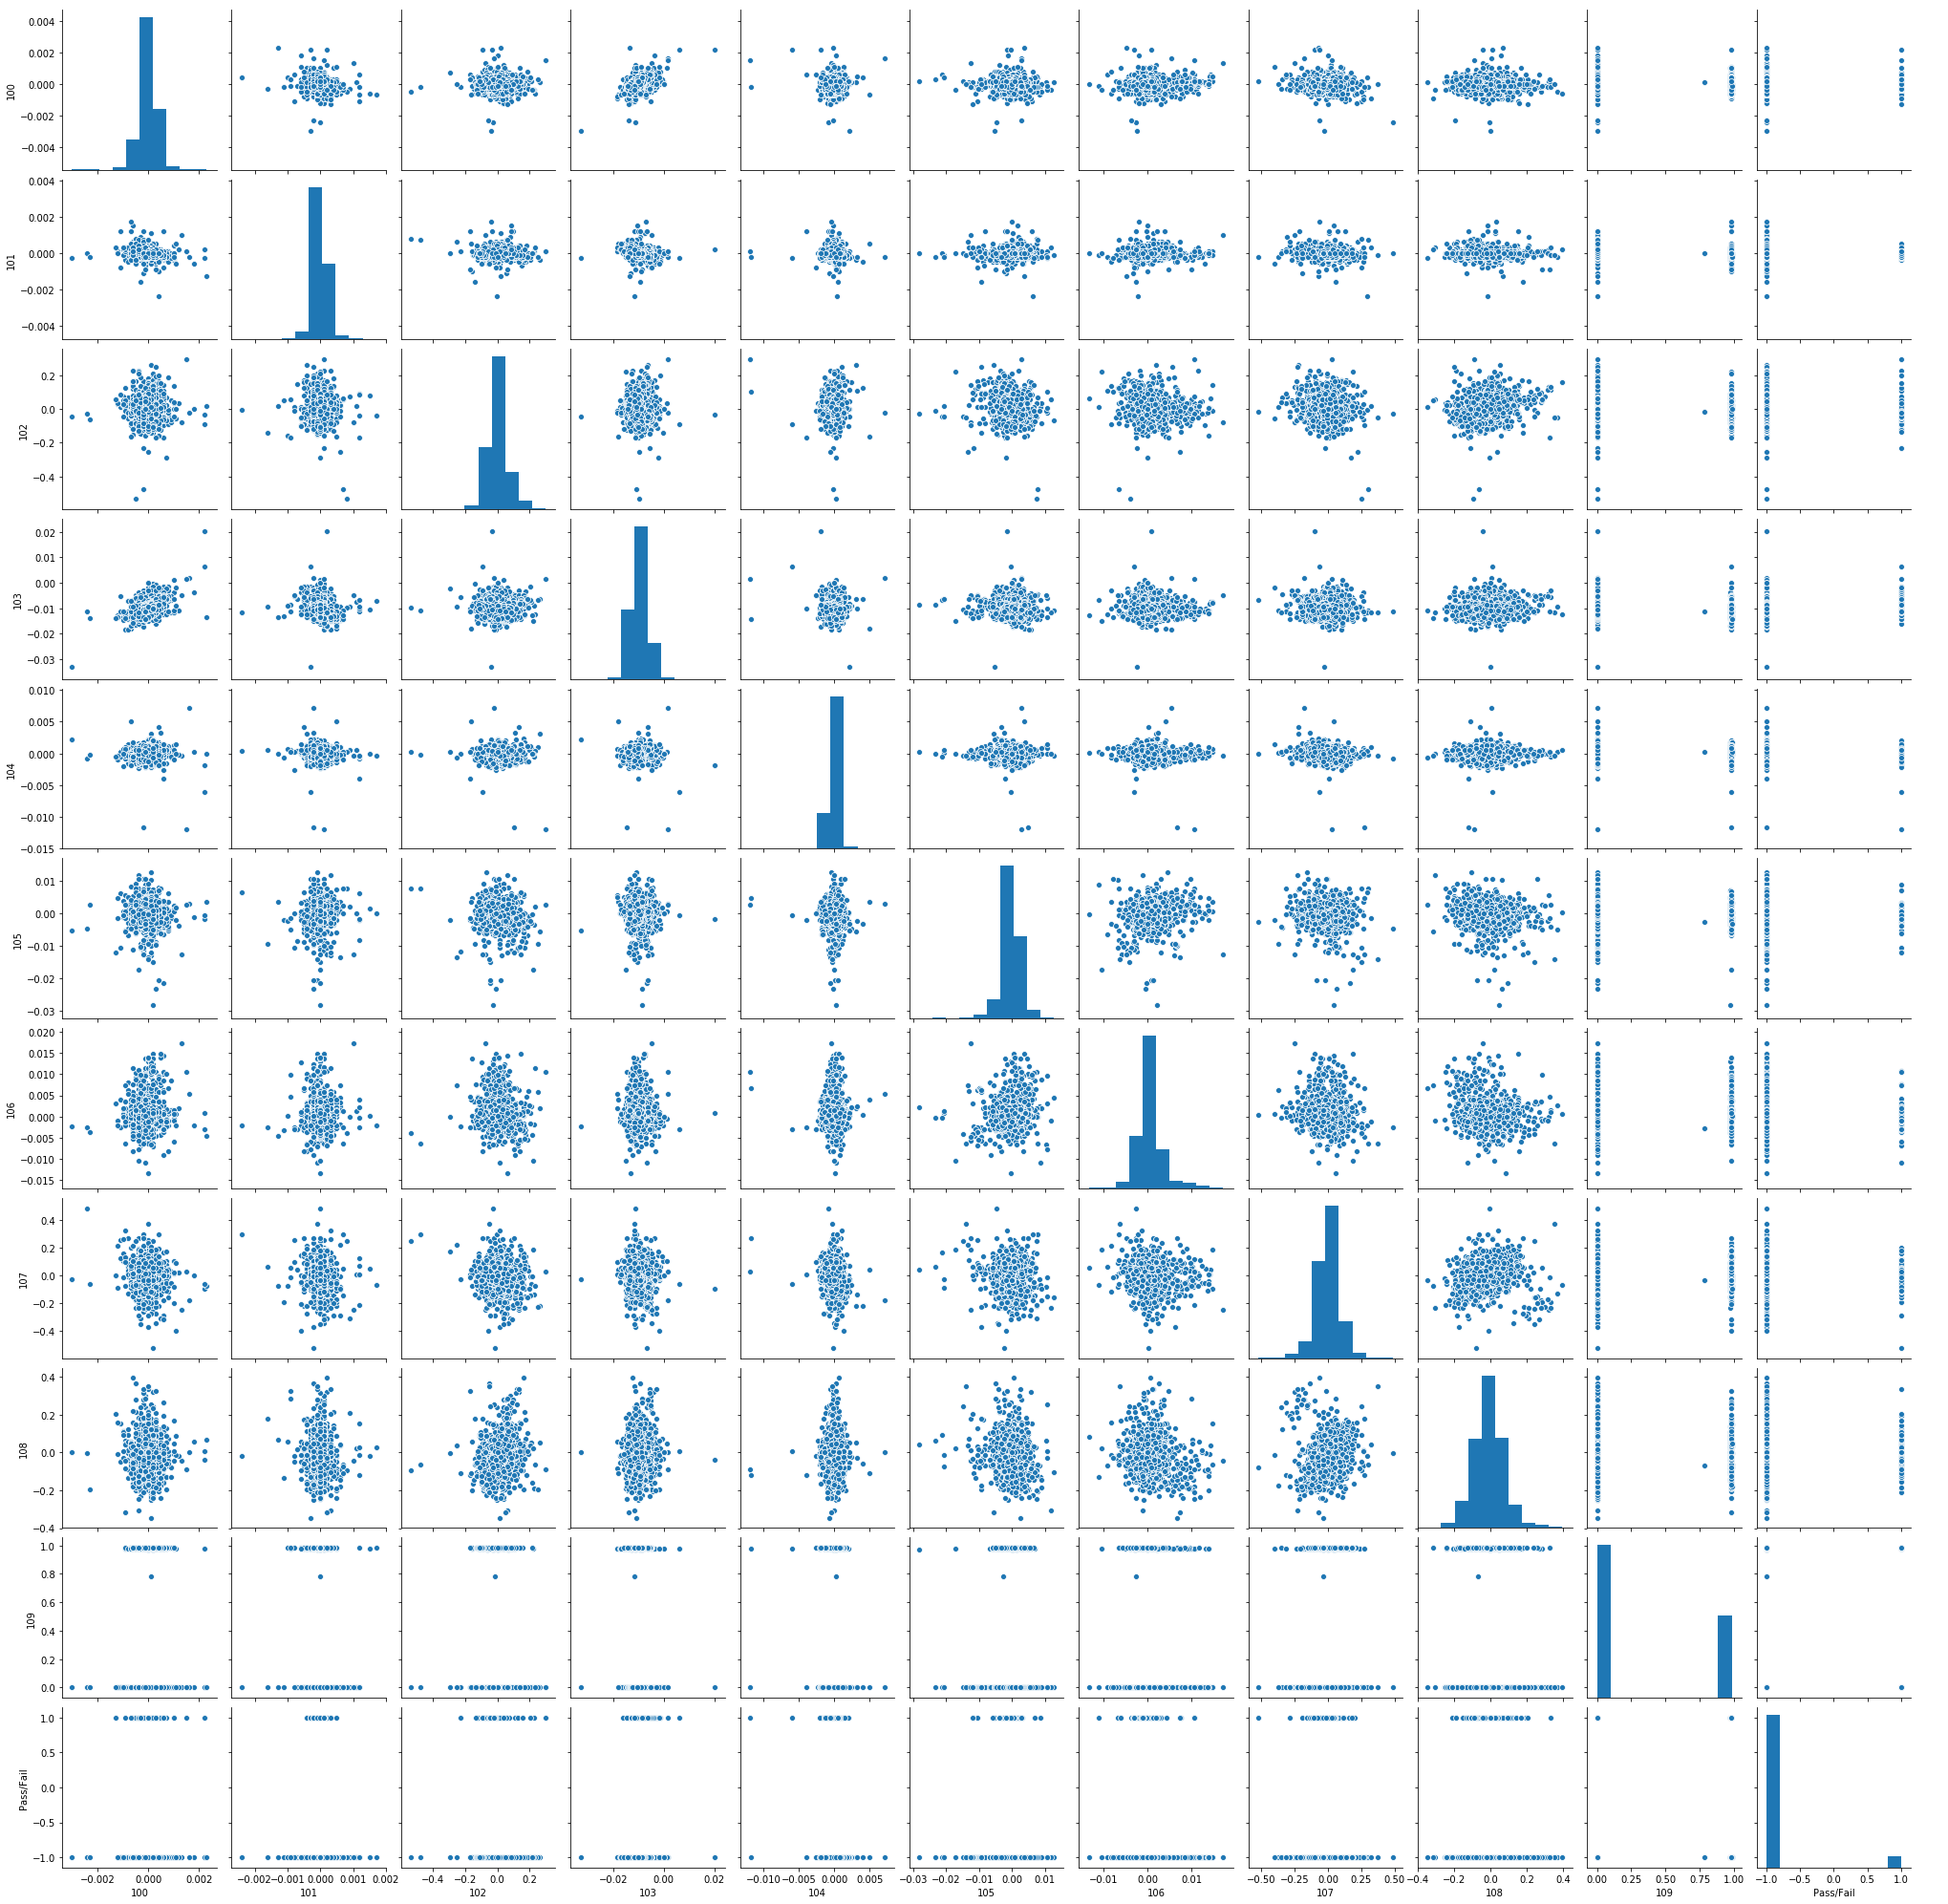

In [21]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교할 수 있습니다. 
sns.pairplot(data_test)

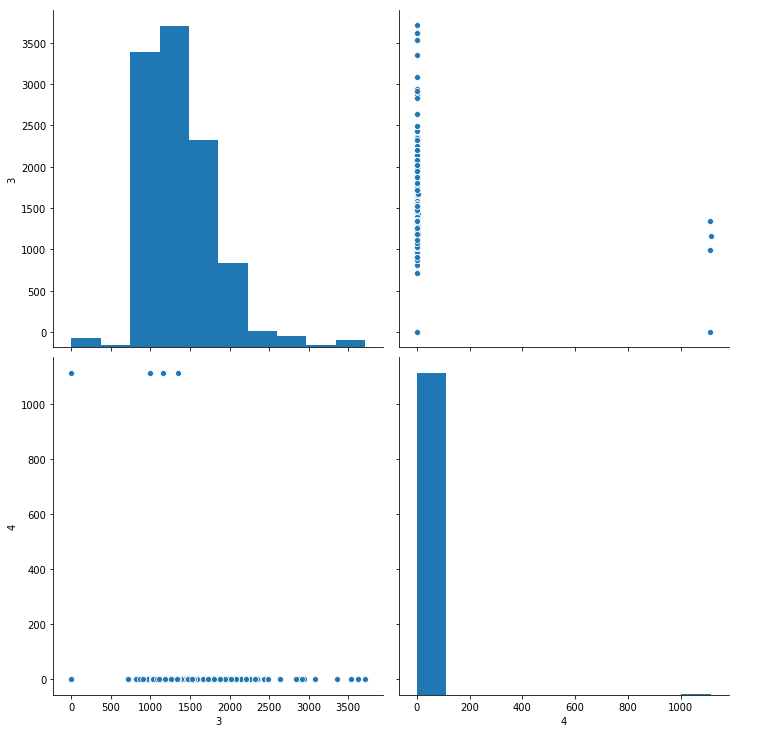

In [13]:
# vars를 사용해서 특정한 컬럼끼리 비교할 수도 있습니다. 
sns.pairplot(data_test,height=5, vars=['3','4'])

In [14]:
#시각화 실습을 위해서 다른 데이터를 가지고 오겠습니다.
#붓꽃 데이터를 가지고 옵니다. 
iris = sns.load_dataset('iris')

#sepal은 꽃받침, petal은 꽃잎입니다. 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


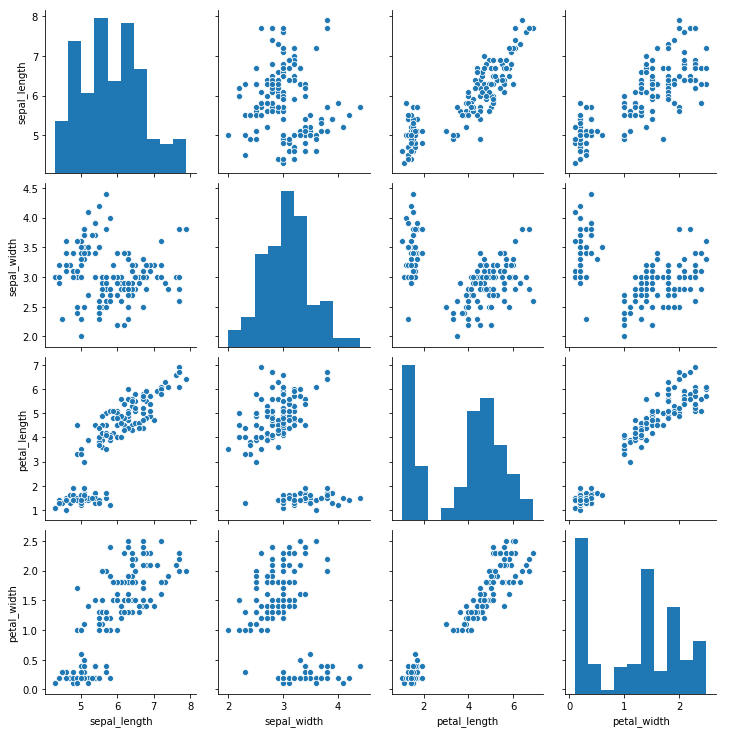

In [15]:
#비교 그림을 그립니다. 
sns.pairplot(iris)

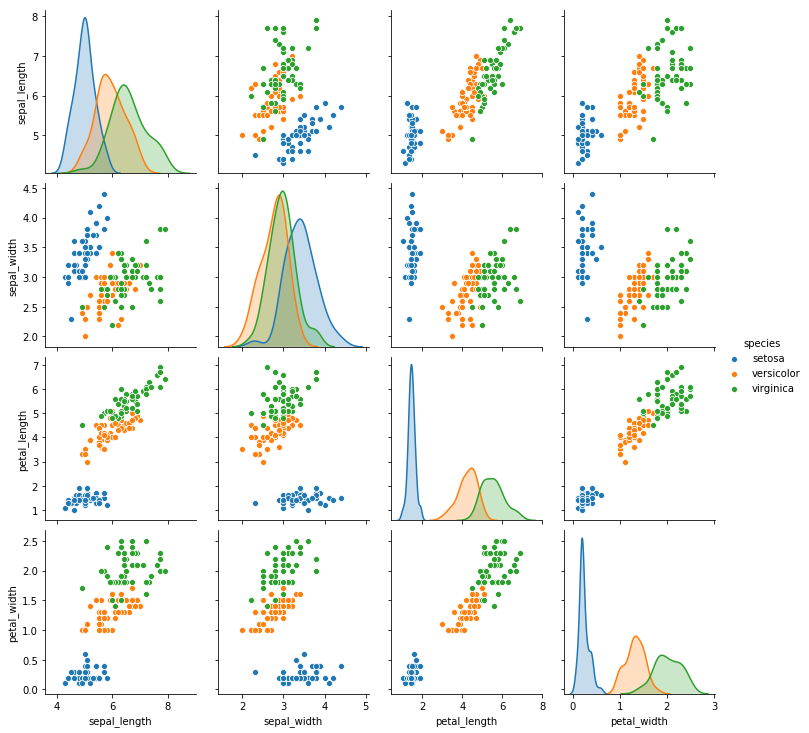

In [16]:
#hue 옵션을 사용해서 데이터를 구분해서 확인하면 좋습니다. 
sns.pairplot(iris, hue='species')

### 3.2. `Pass/Fail` 시각화

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

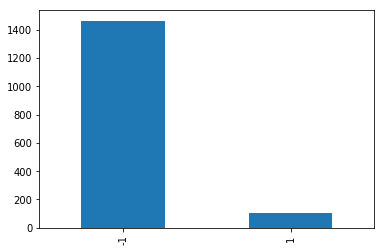

In [17]:
# 분포를 막대 그래프를 사용하여 출력합니다.
# pandas 모듈을 plot()를 사용해서 막대그래프를 그릴 수 있습니다.
# value_counts()로 합계를 구합니다.  
data['Pass/Fail'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
data['Pass/Fail'].value_counts()

### 3.3. `103`번 센서 시각화

Text(0.5,1,'103 Sensor Measurements')

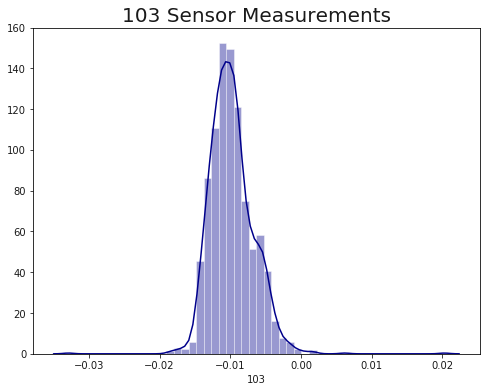

In [18]:
# 그래프의 사이즈를 설정합니다.
# subplots는 한 번에 여러 그래프를 보여주기 위해서 사용합니다. 
# subplots()에선 두개의 값을 받을 수 있는데 figure와 axes 값을 받을 수 있습니다. 여기서 변수명은 상관없습니다. 순서가 중요합니다.
# fig란 figure로써  전체 subplot을 말합니다. 몇개의 그래프가 있던지 상관없이 그것을 담는 그릇이라고 생각하면 됩니다. 전체 사이즈를 말합니다.
# ax는 axe로써 각각의 그래프를 말합니다. 
# figsize(가로, 세로)로 크기를 정합니다. 
fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정합니다.
# style에 white, whitegrid, dark 등을 넣어서 스타일을 바꿀 수 있습니다.
sns.set(style='darkgrid')

# 103번 데이터의 분포를 출력합니다.
# displot로 분포도를 그립니다. 
# yellow, green와 같은 색깔을 넣습니다. 
sns.distplot(data['103'], color = 'darkblue')

# 그래프의 제목을 설정합니다. 
plt.title('103 Sensor Measurements', fontsize = 20)

Text(0.5,1,'103 Sensor Measurements')

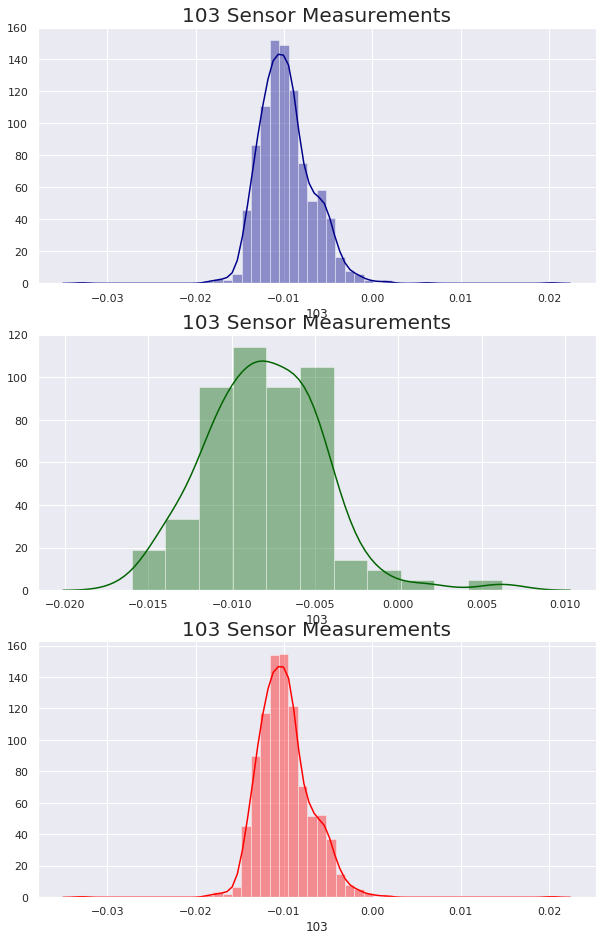

In [19]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다. 
plt.rcParams['figure.figsize'] = (10, 16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다. 
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다. 
plt.subplot(3, 1, 1)
sns.distplot(data['103'], color = 'darkblue')
plt.title('103 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 1인 데이터를 출력합니다.
#  data[data['Pass/Fail']==1]를 하면 'Pass/Fail' 값이 1인 행만 사용할 수 있습니다.
plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]['103'], color = 'darkgreen')
plt.title('103 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 -1인 데이터를 출력합니다.
plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]['103'], color = 'red')
plt.title('103 Sensor Measurements', fontsize = 20)

Text(0.5,1,'103 Sensor Measurements')

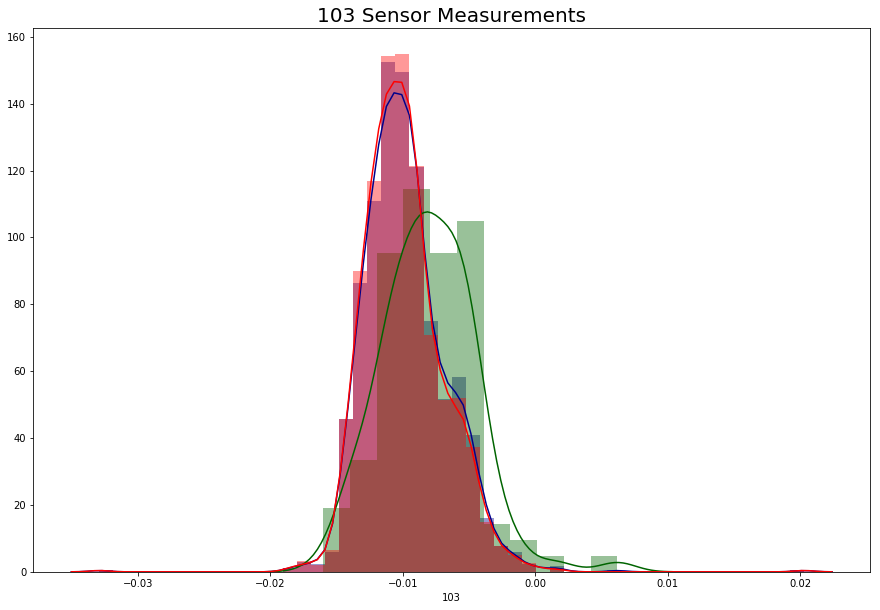

In [23]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다.
plt.rcParams['figure.figsize'] = (15, 10)

# 위 나누어 출력 했던 그래프를 한번에 출력합니다.
sns.distplot(data['103'], color = 'darkblue')
sns.distplot(data[data['Pass/Fail']==1]['103'], color = 'darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['103'], color = 'red')

# 제목과 폰트크기를 정합니다.
plt.title('103 Sensor Measurements', fontsize = 20)

## 4. 데이터 전처리

데이터 전처리는 매우 중요합니다. 머신러닝은 데이터가 중요합니다. 가비지 데이터를 없애주는 것이 중요합니다. 이상한 데이터가 들어가면 이상한 결과가 나옵니다. 그래서 데이터를 잘 처리해야 합니다. 머신러닝 알고리즘은 결손값을 받아들이지 않습니다. 그래서 처리해야 합니다. 없애거나 평균값을 한다거나 등으로 처리합니다. 

머신러닝 알고리즘은 숫자형 값만 받아드립니다. 문자 등을 숫자로 바꿔줘야 합니다. 그리고 특정한 Feature만 선택하는 것이 정확도가 높아질 수 있습니다.

+ 데이터 클린징
+ 데이터 인코딩
+ 데이터 스케일링
+ 이상치 제거

공정 이상 예측을 수행하기 위해서 주어진 센서 데이터에 대해서 분류 모델을 사용할 것입니다.

분류 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전처리를 수행하겠습니다.

1. 전체 데이터를 feature 데이터인 `x`와 label 데이터인 `y`로 분리하기
2. 학습 데이터와 테스트 데이터로 나누기
3. StandardScaler를 통한 데이터 정규화하기

### 4.1.  `x`와  `y`로 분리

머신러닝의 feature 데이터는 `x`, label 데이터는 `y`에 저장합니다.

In [32]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 x에 저장합니다.
# data에는 'Pass/Fail'의 없어집니다. 
x = data.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장합니다.
y = data['Pass/Fail']

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미합니다.
# 1차원 벡터 형태로 출력하기 위해 ravel 사용합니다. 
y = y.values
y

array([-1, -1,  1, ..., -1, -1, -1])

In [33]:
# 타입을 확인합니다. 
type(y)

numpy.ndarray

### 4.2. 학습, 테스트 데이터 분리

사이킷런은 오랫동안 사용된 모듈로 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공합니다. 오랫동안 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리입니다. 주로 Numpy와 Scipy 기반 위에서 구축된 라이브러리입니다. 

피처(feature)는 데이터 세트의 일반 속성입니다. 머신러닝에서는 피처라는 단어를 씁니다.

***타겟값*** 또는 ***결정값***은 지도 학습을 할 때 데이터의 학습을 위해 주어지는 ***정답 데이터***입니다. 지도 학습 중 분류의 경우에는 이 결정값을 ***레이블*** 또는 ***클래스***라고 합니다. 

분류는 대표적인 지도학습 방법입니다. 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습합니다. 그리고 별도의 테스트 데이터 세트에서 예측을 합니다. 

지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤에 미지의 정답을 예측하는 방식입니다. 이때 학습을 위해 주어진 데이터 세트를 학습 데이터라고 하고 머신러닝 모델의 예측 성능을 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트라고 합니다. 

머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다. 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킵니다. 학습된 머신러닝 모델을 이용해서 테스트 데이터의 분류를 예측합니다. 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해서 머신러닝 모델의 성능을 평가합니다.  

In [34]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손쉽게 분리 할 수 있습니다.
# train_test_split를 사용해서 학습 데이터와 테스트 데이터를 분류합니다. 
# x는 머신러닝의 feature 데이터이고 y는 label(타겟) 데이터입니다. 
# test_size는 테스트 데이터의 비율입니다. 0.2는 20%가 테스트 데이터라는 뜻입니다. 
# random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수값입니다.
# train_test_split()는 호출시 무작위로 데이터를 분리합니다.
# random_state를 지정하지 않으면 수행할때마다 다른 학습/테스트 데이터를 생성합니다. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### 4.3. 데이터 정규화

각 변수 마다의 스케일 차이를 맞추기 위하여 정규화를 수행합니다. 

정규화는 서로 다른 피처의 크기를 통일하기 위해서 크기를 변환해주는 개념입니다.

표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미합니다.

In [35]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 불러옵니다.
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행합니다. 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train, x_test

(array([[-0.03046509, -0.04114539,  0.12555935, ...,  1.76817176,
          2.04130949,  5.0125072 ],
        [ 0.17480579,  0.2118661 ,  0.44705004, ..., -0.47244233,
         -0.27873119, -0.58252183],
        [-0.59892   ,  0.38892294,  0.38424139, ..., -0.9861441 ,
         -0.78308786, -0.84045381],
        ...,
        [ 0.14042278, -0.25706142, -0.03982154, ..., -1.32496867,
         -1.38831586, -0.88403282],
        [ 0.3628311 , -0.07385994, -0.26243743, ..., -0.48337216,
         -0.44685008, -0.66491315],
        [-0.24449391, -0.23834301, -0.10616653, ..., -1.0298634 ,
         -1.15294942, -0.77110241]]),
 array([[-4.29653971e-01, -3.59301506e-01, -4.86249310e-04, ...,
         -9.86144100e-01, -1.05207808e+00, -7.39544727e-01],
        [-3.81323140e-01,  3.79307704e-01,  4.60072576e-01, ...,
          8.49787339e-02,  2.25625479e-01, -3.37420608e-01],
        [ 9.56059348e-02,  4.05536240e-01,  1.16663027e-01, ...,
          4.78452428e-01, -9.74096680e-03, -8.83767719e-

In [36]:
#mean()으로 평균을 구하고 var()로 분산을 구합니다. 
#e는 소수부의 크기를 알려주는 자리입니다. 여기서는 엄청 작은 값으로 0으로 생각하면 됩니다. 
x_train_sc = pd.DataFrame(data=x_train)
print("평균")
print(x_train_sc.mean())
print("분산")
print(x_train_sc.var())

평균
0     -2.537320e-15
1     -2.170296e-15
2      7.791719e-17
3     -6.441597e-17
4      1.218321e-18
5      4.259694e-17
6      2.999950e-16
7      6.800005e-16
8      1.378614e-16
9     -3.823314e-17
10     3.677115e-18
11     1.668391e-15
12     1.467080e-15
13     0.000000e+00
14    -3.696609e-16
15     3.344159e-15
16     8.143924e-17
17    -1.199388e-15
18     5.205555e-16
19     8.848557e-16
20    -9.640688e-16
21     4.626852e-16
22     3.044917e-16
23     2.385695e-17
24     1.063262e-17
25     3.615092e-16
26    -2.023300e-16
27     2.180574e-16
28    -3.706307e-16
29    -3.091435e-16
           ...     
560    4.279631e-17
561    1.078325e-16
562   -3.260671e-17
563   -5.493522e-17
564    4.346971e-16
565    2.225762e-16
566   -1.332622e-16
567    2.498666e-17
568    5.179859e-16
569    5.298590e-17
570   -5.386797e-15
571   -7.044556e-16
572    6.747285e-17
573   -1.882860e-16
574   -2.959413e-17
575   -2.993526e-16
576   -6.601087e-17
577   -4.173304e-17
578    2.686509e-

## 5. 머신러닝 모델 학습

전처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 분류 모델인 **로지스틱 분류기(logistic regression classifier)**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.

최종적으로 더욱 성능 좋은 모델을 사용하기 위한 모델 튜닝 방법을 사용해야 합니다.

## 분류와 회귀
분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 레이블값을 예측하는 것입니다. 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우합니다.

분류는 이산적인 데이터 값이 있을 때 많이 사용합니다. 

***대표적인 분류 알고리즘***
+ 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
+ 데이터 균일도에 따른 규칙 기반의 결정 트리
+ 서로 다르거나 같은 머신러닝 알고리즘을 결합한 앙상블
+ 근접 거리를 기준으로 하는 최소 근접 알고리즘

회귀(Regression)는 현대 통계학을 이루는 큰 축입니다. 회귀 분석은 이처럼 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법입니다.

+ 부모의 키가 크더라도 자식의 키가 대를 이어서 계속 커지지는 않는다.

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭합니다. 
+ Y = W1*X1+W2*X2+W2*X2...
+ Y는 종속변수입니다. 
+ Xn는 독립변수입니다. 
+ Wn는 독립변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)을 말합니다. 

***머신러닝 회귀 예측의 핵심은 주어진 피처와 결정값 데이터 기반에서 학습을 통해서 최적의 회귀 계수를 찾는 것입니다.***

회귀는 연속적인 데이터 값이 있을 때 많이 사용합니다. 

### 로지스틱 회귀
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘입니다. 

로지스틱 회귀는 회귀라는 말이 들어갔지만 분류에 사용됩니다. 

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아닙니다.

시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 점입니다. 

확률에 따라서 분류를 결정합니다.

로지스틱 회귀는 주로 이진(0과 1) 분류에 사용됩니다. 로지스틱 회귀에서 예측 값은 예측 확률의 의미합니다.

예측 값 즉, 예측 확률이 0.5이상이면 1로, 그렇지 않으면 0으로 예측합니다.

### 5.1. 기본 분류 모델 학습 - 로지스틱 분류기

In [37]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류기 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정합니다.
model = LogisticRegression(max_iter =5000)

# 데이터를 학습시킬 때는 fit 함수를 사용합니다. 
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 확인합니다. 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9864325618515563
0.8853503184713376


In [38]:
# predict으로 얼마나 예측하는지 알 수 있습니다.
# accuracy_score로 정확도를 평가할 수 있습니다. 
from sklearn.metrics import accuracy_score

# x_test로 예측을 해봅니다. 
# score와 같은 값이 나오는 것을 볼 수 있습니다.
model_preds = model.predict(x_test)
print(accuracy_score(y_test, model_preds ))

0.8853503184713376


### 5.2. 다양한 분류 모델 학습

In [53]:
#xgboost 설치가 잘 안되면 Anaconda Powershell Prompt(anaconda3)에서 해봅니다.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#여러 모델을 append해서 추가합니다. 
models = []
models.append(('LR', LogisticRegression(max_iter =5000))) #로지스틱 회귀모델 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습을 합니다. 
    model.fit(x_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

ModuleNotFoundError: No module named 'xgboost'

***xgboost***는 eXtra Gradient Boost의 약자입니다. 캐글 등에서 많이 쓰입니다. 
뛰어난 예측 성능, GBM 대비 빠른 수행시간,  여러가지 편의 기능이 있어서 많이 쓰입니다. 

In [40]:
# xgb 모델에서 변수 중요도를 출력합니다.
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용합니다. 
# models[-1][1]는 models 리스트에서 맨 마지막 요소(이것도 리스트)에서 두번째 요소를 말합니다. 
# importance_type는 중요도가 어떻게 계산되는지 정합니다. 
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균입니다. 

xgb.plot_importance(models[-1][1], height = 5, grid = True, importance_type = 'gain', show_values = True, max_num_features = 20)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

NameError: name 'xgb' is not defined

### 5.3. 모델 튜닝 및 K-fold 교차 검증

***교차 검증***은 학습한 데이터로 여러 번 검증하는 것입니다. 학습 데이터를 다시 분할하여 학습 데이터와 학습된 모델의 성능을 평가하는 검증 데이터로 나뉩니다. 교차 검증은 여러 번 테스트 데이터를 돌린다고 보면 됩니다. 여러번 테스트를 해서 알고리즘의 성능을 테스트해봐야 합니다. 

머신러닝 모델들은 데이터의 특성에 잘 맞도록 다양한 파라미터를 조절하여 성능을 높일 수 있습니다. 이러한 과정을 모델 튜닝이라 하며 본 과정에서는 GridSearchCV를 사용하여 구현해보겠습니다. 추가로 k-fold 방식을 사용하여 학습 과정에서 생길 수 있는 과적합을 예방해 봅시다.
K는 몇 번 접는지를 나타냅니다. 5라면 5개의 폴드 세트가 있다는 뜻입니다. 

***과적합***은 학습 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상입니다. 예를 들어, 검은색 말을 보며 말의 특성을 학습한 사람이 흰색이나 갈색 말을 보고는 말이라고 인식하지 못 하는 현상이 과적합과 유사한 경우입니다.

***Stratified K 폴드***는 불균형한 분포도를 가진 레이블(결정값) 데이터 집합을 위한 K 폴드 방식입니다. 표본이 적은 경우 학습데이터에 해당 데이터가 없을 수 있습니다. 그러면 패턴을 학습하기가 어렵습니다. Stratified K 폴드는 학습데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터를 추출합니다. 

***GridSearchCV***에서 Grid는 격자를 말합니다. CV(Cross Validation)는 교차 검증을 말합니다. 

최적의 머신러닝 모델을 만드는 과정은 많은 반복과 연구가 필요합니다. 모델의 하이퍼 파라미터를 조종해서 언제가 가장 좋은 성능의 모델이 되는지 반복을 통해 찾아내는 것입니다. 

***일반선형회귀***는 예측값과 실제값의 RSS(residual sum of squares : 오차의 크기)를 최소화할 수 있도록 회귀 계수를 최적화하며 규제(Regularization)를 적용하지 않은 모델입니다.

***릿지(Ridge)회귀***는 선형 회귀에 L2 규제를 추가한 회귀 모델이니다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델입니다.

***라쏘(Lasso)회귀***는 선형 회귀에 L1 규제를 적용한 방식입니다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것입니다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불립니다.

***엘라스틱넷(LeasticNet) 방식***은 L2, L1 규제를 함께 결합한 모델입니다. 주로 피처가 많은 데이터 셋에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정합니다.

In [41]:
# KFold 예시입니다.
# DecisionTreeClassifier로 결정트리모델을 사용합니다. 
# accuracy_score로 평가를 합니다. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성합니다.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [42]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환합니다. 
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출합니다.
    x1_train, x1_test = features[train_index], features[test_index]
    y1_train, y1_test = label[train_index], label[test_index]
    #학습 및 예측합니다.
    dt_clf.fit(x1_train , y1_train)    
    pred = dt_clf.predict(x1_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정합니다.
    accuracy = np.round(accuracy_score(y1_test,pred), 4)
    train_size = x1_train.shape[0]
    test_size = x1_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산합니다.
# mean은 평균입니다. 
print('\n# 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

# 평균 검증 정확도: 0.9


In [43]:
from sklearn.model_selection import GridSearchCV
# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
# C 값이 작아지면 Penalty가 강해집니다. 
# C 값이 크면 Penalty가 약해집니다.(정규화가 없어진다)
# 보통 로그스케일로 지정합니다. = 0.01, 0.1, 1, 10
parameters = {'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}

# 로지스틱 분류기 모델을 튜닝하기 위하여 선언합니다.
LR = LogisticRegression(max_iter = 1000)

# 데이터를 준비합니다.
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 모델 튜닝을 위해서 GridSearchCV를 사용합니다.
# 정확도로 평가를 합니다. 
# cv는 세트 수입니다. 
LR_CV = GridSearchCV(LR, parameters, scoring = 'accuracy', cv = 5)

# 학습을 수행합니다.
LR_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(LR_CV.score(x_train, y_train))
print(LR_CV.score(x_test, y_test))

# 특정 파라미터 조합이 지원하지 않는 경우가 있기에 Warning 메시지가 출력됩니다.

0.9273743016759777
0.9585987261146497


In [44]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train, y_train)

# GridSearchCV를 사용하지 않았을 때와 비교해봅니다.
print(LR.score(x_test, y_test))

0.8853503184713376


In [45]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
LR_CV.best_params_

{'C': 0.001, 'penalty': 'l1'}

In [46]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_LR_CV = LR_CV.best_estimator_
print(best_LR_CV)

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_LR_CV.score(x_test, y_test)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


0.9585987261146497

 ### 붓꽃 데이터를 사용해서 GridSearchCV 확인해보기

In [47]:
# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리합니다.
iris = load_iris()
x2_train, x2_test, y2_train, y2_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# parameter 들을 dictionary 형태로 설정합니다.
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}


# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(x2_train, y2_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환합니다.
scores_df = pd.DataFrame(grid_dtree.cv_results_)

#확인해봅니다. #mean_test_score가 높은 것이 좋은 것입니다. rank_text_score에서 순위를 확인할 수 있습니다. 
scores_df[['params', 'mean_test_score', 'rank_test_score','split0_test_score', 'split1_test_score', 'split2_test_score']]




/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.950,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.950,1.0,0.95


## 6. 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 합니다.

오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다. 

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

공정 이상 예측에서 중요한 것은 이상 없음을 정확히 예측하는 것 보단 이상 있음을 정확히 예측하는 것입니다. 

recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 정밀도는 FP가 낮아야 합니다. 
+ TP / (FP + TP)

재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)


이번 파트에서는 recall 방식을 포함한 또 다른 대표적인 평가 방법에 대해서 알아보고 주어진 데이터에 대해서 예측하는 것을 수행해보겠습니다.

### 6.1. Confusion Matrix

기존 score에서 볼 수 있었던 결과는 accuracy 기반의 결과였습니다. confusion matrix를 출력하여 각 class 별로 예측한 결과에 대해서 자세히 알아봅시다.

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# xgb 모델의 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
# models[-4]는 GaussianNB
model_predition = models[-4][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm = confusion_matrix(y_test, model_predition)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)

# annot은 annotate each cell with numeric value로 셀에 숫자값을 표시하는지 정하는 것입니다. 
# cmap으로 색깔을 지정할 수 있습니다. cmap='RdYlGn_r' cmap="YlGnBu"
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
cm

NameError: name 'models' is not defined

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **0,1 의 값:** `이상 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **1,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수
- **1,1 의 값:** `이상 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수

### 6.2. Precision & Recall

분류 모델의 또 다른 성능 지표로 Precsion과 Recall를 구하여 봅시다.

In [51]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

NameError: name 'model_predition' is not defined

### 6.3. 테스트 데이터의 예측값 출력

테스트 데이터를 하나씩 입력하여 그 결과를 출력해 봅시다.

In [52]:
# 0번부터 9번까지 10개를 출력해보겠습니다.
for i in range(100): 
    
    # XGB 모델을 사용하였습니다.
    # reshape()에서 -1이 들어간 곳은 가변적으로 바꿉니다. 예를 들어 12개의 원소가 있고 reshape(-1,2)를 하면 열 2개를 맞추기 위해서 행을 6개로 바꿉니다. 
    prediction = models[-1][1].predict(x_test[i].reshape(1,-1))
    
    #문자열 포맷팅의 방법입니다. {}가 괄호()안의 값에 각각 대응됩니다. 
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

NameError: name 'models' is not defined

## 7. 불균형 class 데이터 처리

`Pass/Fail` 데이터의 분포를 보면 알 수 있듯이, 데이터는 불균형한 class를 가지고 있습니다.

데이터가 불균형 경우, 상대적으로 적은 class의 데이터들은 모델의 성능에 큰 영향을 주지 못합니다.

위 confusion matrix의 결과를 보면 알 수 있듯이, 이상 없음에 대해서는 예측을 정확히 하고 있으나 이상 있음에 대해서는 거의 맞추지 못하고 있습니다.

이를 해결하기 위해서 `under sampling`, `over sampling`, `weight balance` 등의 다양한 방법을 사용합니다.

---